In [1]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
import warnings
import os
import yellowbrick
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
cardio = pd.read_csv('cardio_train.csv',delimiter=';')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
#cleaning up the dataset by redfining datatset in terms of converting cardio intro a string, calculating age, getting height into proper units and calucalting bmi
cardio[['cardio']] = cardio[['cardio']].astype(str)
cardio['year']= (cardio['age']/365).round(0)
cardio['height(m)']= (cardio['height']/100).round(3)
cardio['BMI']= (cardio['weight']/((cardio['height(m)'])*cardio['height(m)']))
cardio = cardio.drop(columns=['height','age'])

In [5]:
cardio.head()

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,height(m),BMI
0,0,2,62.0,110,80,1,1,0,0,1,0,50.0,1.68,21.967120
1,1,1,85.0,140,90,3,1,0,0,1,1,55.0,1.56,34.927679
2,2,1,64.0,130,70,3,1,0,0,0,1,52.0,1.65,23.507805
3,3,2,82.0,150,100,1,1,0,0,1,1,48.0,1.69,28.710479
4,4,1,56.0,100,60,1,1,0,0,0,0,48.0,1.56,23.011177


In [6]:
cardio['year']=cardio['year'].astype('int64')
cardio['height(m)']=cardio['height(m)'].astype('int64')
cardio['BMI']=cardio['BMI'].astype('int64')
cardio['weight']=cardio['weight'].astype('int64')

In [7]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           70000 non-null  int64 
 1   gender       70000 non-null  int64 
 2   weight       70000 non-null  int64 
 3   ap_hi        70000 non-null  int64 
 4   ap_lo        70000 non-null  int64 
 5   cholesterol  70000 non-null  int64 
 6   gluc         70000 non-null  int64 
 7   smoke        70000 non-null  int64 
 8   alco         70000 non-null  int64 
 9   active       70000 non-null  int64 
 10  cardio       70000 non-null  object
 11  year         70000 non-null  int64 
 12  height(m)    70000 non-null  int64 
 13  BMI          70000 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 7.5+ MB


cardio = pd.read_csv('cardio_train.csv',delimiter=';')
cardio = cardio.drop(columns=['id'])
cardio.head()

In [8]:
#print dataset info
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', cardio.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', cardio.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

#datasetdetails

print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
cardio.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 70000
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           70000 non-null  int64 
 1   gender       70000 non-null  int64 
 2   weight       70000 non-null  int64 
 3   ap_hi        70000 non-null  int64 
 4   ap_lo        70000 non-null  int64 
 5   cholesterol  70000 non-null  int64 
 6   gluc         70000 non-null  int64 
 7   smoke        70000 non-null  int64 
 8   alco         70000 non-null  int64 
 9   active       70000 non-null  int64 
 10  cardio       70000 non-null  object
 11  year         70000 non-null  int64 
 12  height(m)    70000 non-null  int64 
 13  BMI          70000 non-null  int64 
dtypes: int64(13), object(1)

## Things to note about Dataset

age - Age of patient in years

gender-Gender of the person sex—(1=male; 0=female).

height-Height of the person in cm

weight- Weight of the person in kgs

ap high-Systolic blood pressure, the top number, measures the force your heart exerts on the walls of your arteries each time it beats

ap lo-Diastolic blood pressure ,the bottom number measures the pressure on the walls of your arteries between heartbeats.

cholesterol-Cholesterol is a wax like substance present in our blood.

gluc -Blood carries glucose to all of our body’s cells to use for energy. (gluc-1: normal,2: prediabetic,3:diabetic)

smoke - Do they smoke or not?Values are in binary

alco -Consumption of alcohol.

active-Physical activity of a person.

cardio-The target variable which defines the presence or absence of cardiovascular disease.

In [9]:
#finding null values in dataset
cardio.isnull().sum()

id             0
gender         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
year           0
height(m)      0
BMI            0
dtype: int64

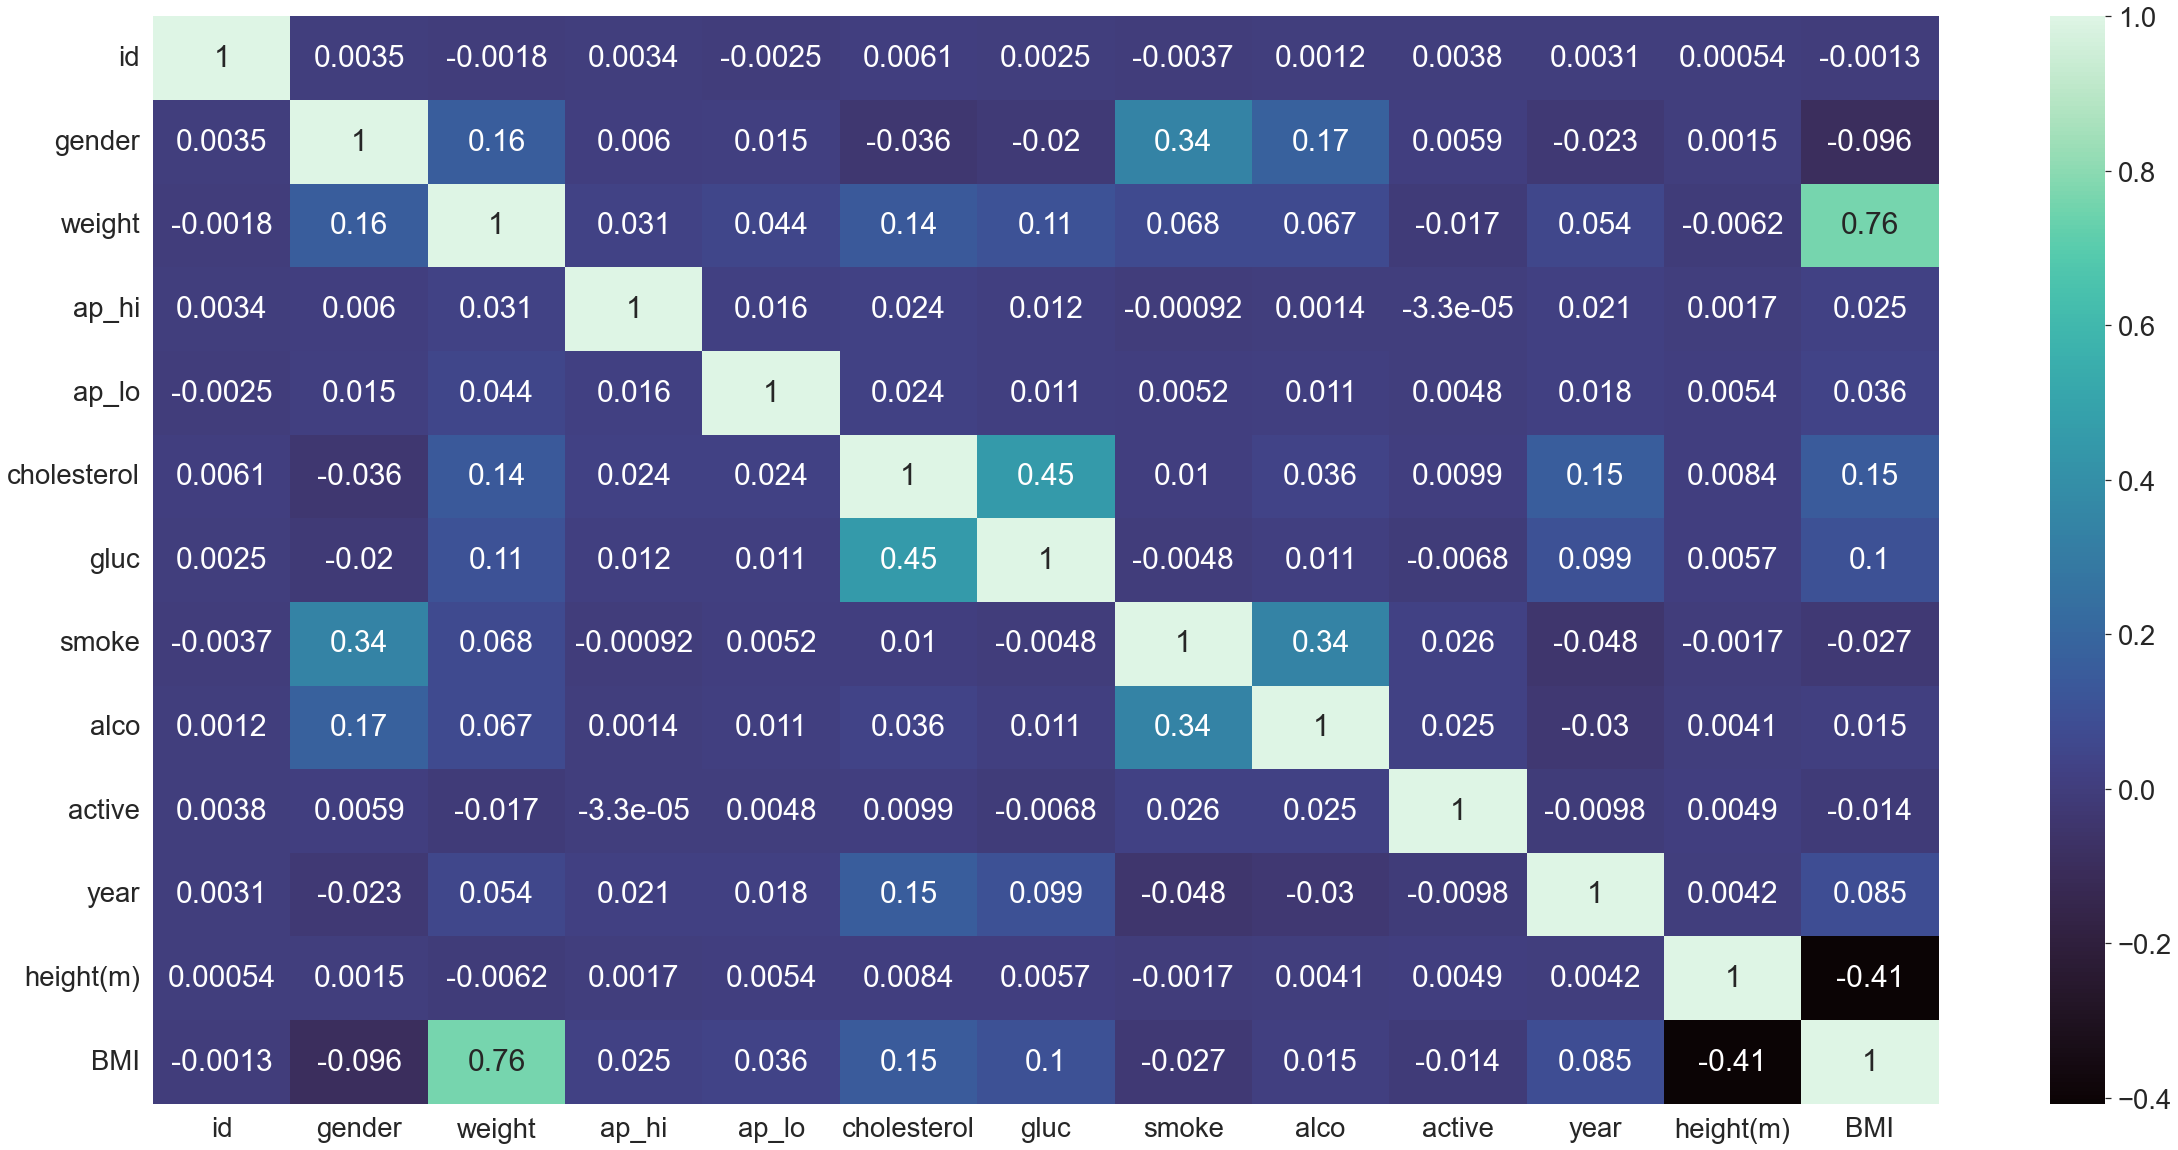

In [10]:
#Correlation of each feature in the dataset
corrmat = cardio.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,20))
sns.set(font_scale=2.5)
g=sns.heatmap(cardio[top_corr_features].corr(),annot=True,cmap="mako")

Text(0.5, 1.0, 'Pairwise correlation matrix')

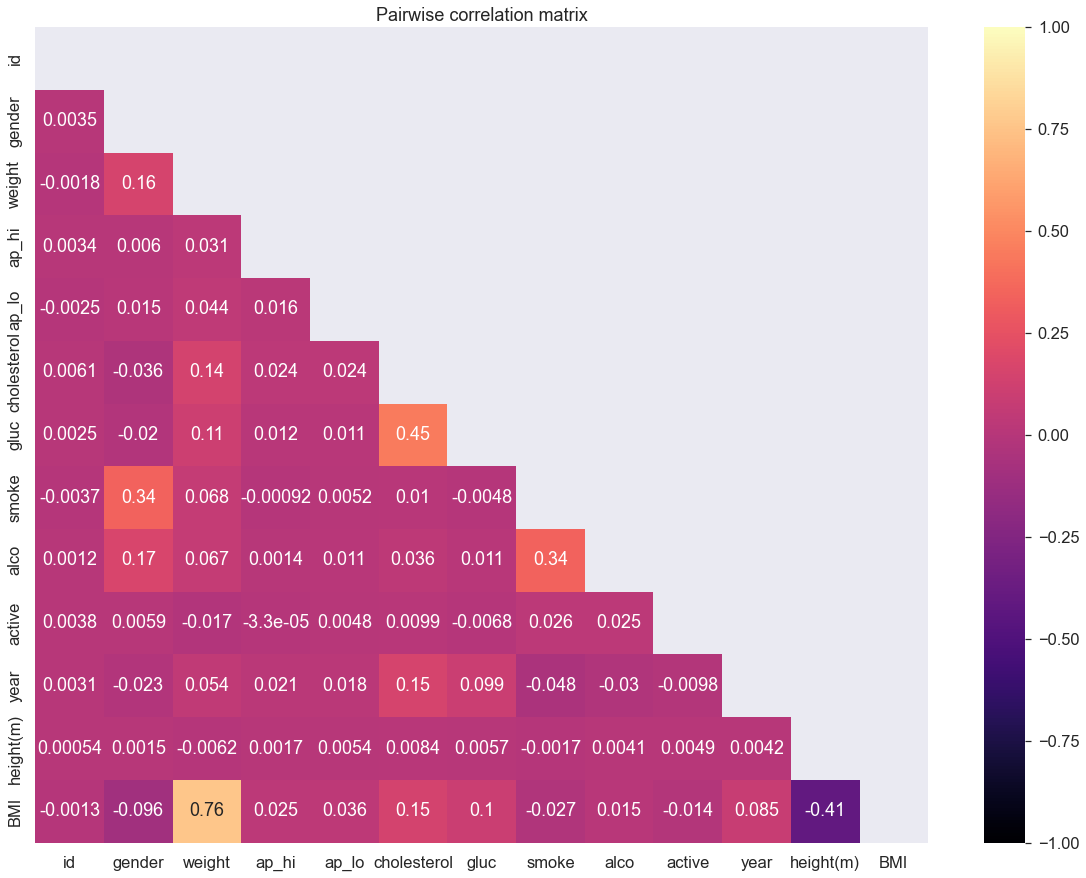

In [11]:
#pair wise correlation matrix
corr_matrix = cardio.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 
sns.set(font_scale=1.5)
plt.figure(figsize=(20,15))
sns.despine(top=True, right=True, bottom=True)
g1 = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1,annot=True, cmap="magma")
g1.set_title("Pairwise correlation matrix")

In [12]:
X = cardio.iloc[:,1:-1]
y = cardio.iloc[:, -1]
X

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,height(m)
0,2,62,110,80,1,1,0,0,1,0,50,1
1,1,85,140,90,3,1,0,0,1,1,55,1
2,1,64,130,70,3,1,0,0,0,1,52,1
3,2,82,150,100,1,1,0,0,1,1,48,1
4,1,56,100,60,1,1,0,0,0,0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,76,120,80,1,1,1,0,1,0,53,1
69996,1,126,140,90,2,2,0,0,1,1,62,1
69997,2,105,180,90,3,1,0,1,0,1,52,1
69998,1,72,135,80,1,2,0,0,0,1,61,1


In [13]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           70000 non-null  int64 
 1   gender       70000 non-null  int64 
 2   weight       70000 non-null  int64 
 3   ap_hi        70000 non-null  int64 
 4   ap_lo        70000 non-null  int64 
 5   cholesterol  70000 non-null  int64 
 6   gluc         70000 non-null  int64 
 7   smoke        70000 non-null  int64 
 8   alco         70000 non-null  int64 
 9   active       70000 non-null  int64 
 10  cardio       70000 non-null  object
 11  year         70000 non-null  int64 
 12  height(m)    70000 non-null  int64 
 13  BMI          70000 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 7.5+ MB


In [14]:
X = cardio.iloc[:,1:-1]
y = cardio.iloc[:, -1]
X

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,height(m)
0,2,62,110,80,1,1,0,0,1,0,50,1
1,1,85,140,90,3,1,0,0,1,1,55,1
2,1,64,130,70,3,1,0,0,0,1,52,1
3,2,82,150,100,1,1,0,0,1,1,48,1
4,1,56,100,60,1,1,0,0,0,0,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,76,120,80,1,1,1,0,1,0,53,1
69996,1,126,140,90,2,2,0,0,1,1,62,1
69997,2,105,180,90,3,1,0,1,0,1,52,1
69998,1,72,135,80,1,2,0,0,0,1,61,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.5,
                                                    random_state = 42)


In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
# --- Applying Logistic Regression ---
classifier_lr = LogisticRegression(random_state = 10)
classifier_lr.fit(X_train, y_train)
# --- Predicting the test values ---
y_pred_lr = classifier_lr.predict(X_test)
# # --- Scoring ---
# acc_lr = accuracy_score(y_test, y_pred_lr)
# f1_lr = f1_score(y_test, y_pred_lr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
